In [ ]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read Test and Train
train=pd.read_csv("trainloan.csv")
test=pd.read_csv("testloan.csv")

In [ ]:
# Copy of original data
train_original=train.copy()
test_original=test.copy()

In [ ]:
# Features in the dataset
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [ ]:
# Print data types for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# Shape of the dataset
train.shape, test.shape

((614, 13), (367, 12))

# Univariate analysis

In [ ]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [ ]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

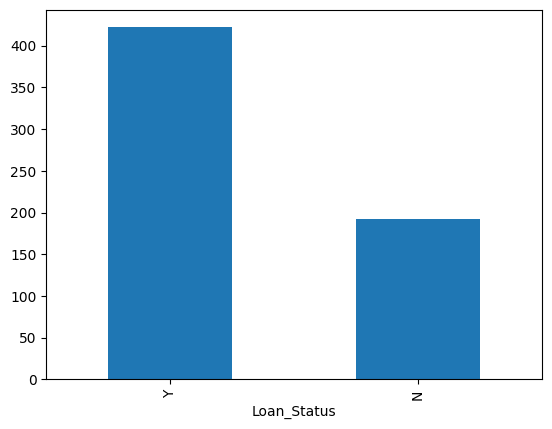

In [ ]:
train['Loan_Status'].value_counts(normalize=True)
train['Loan_Status'].value_counts().plot.bar()

around 69% loan applications were approved

### Univariate analysis of categorical features

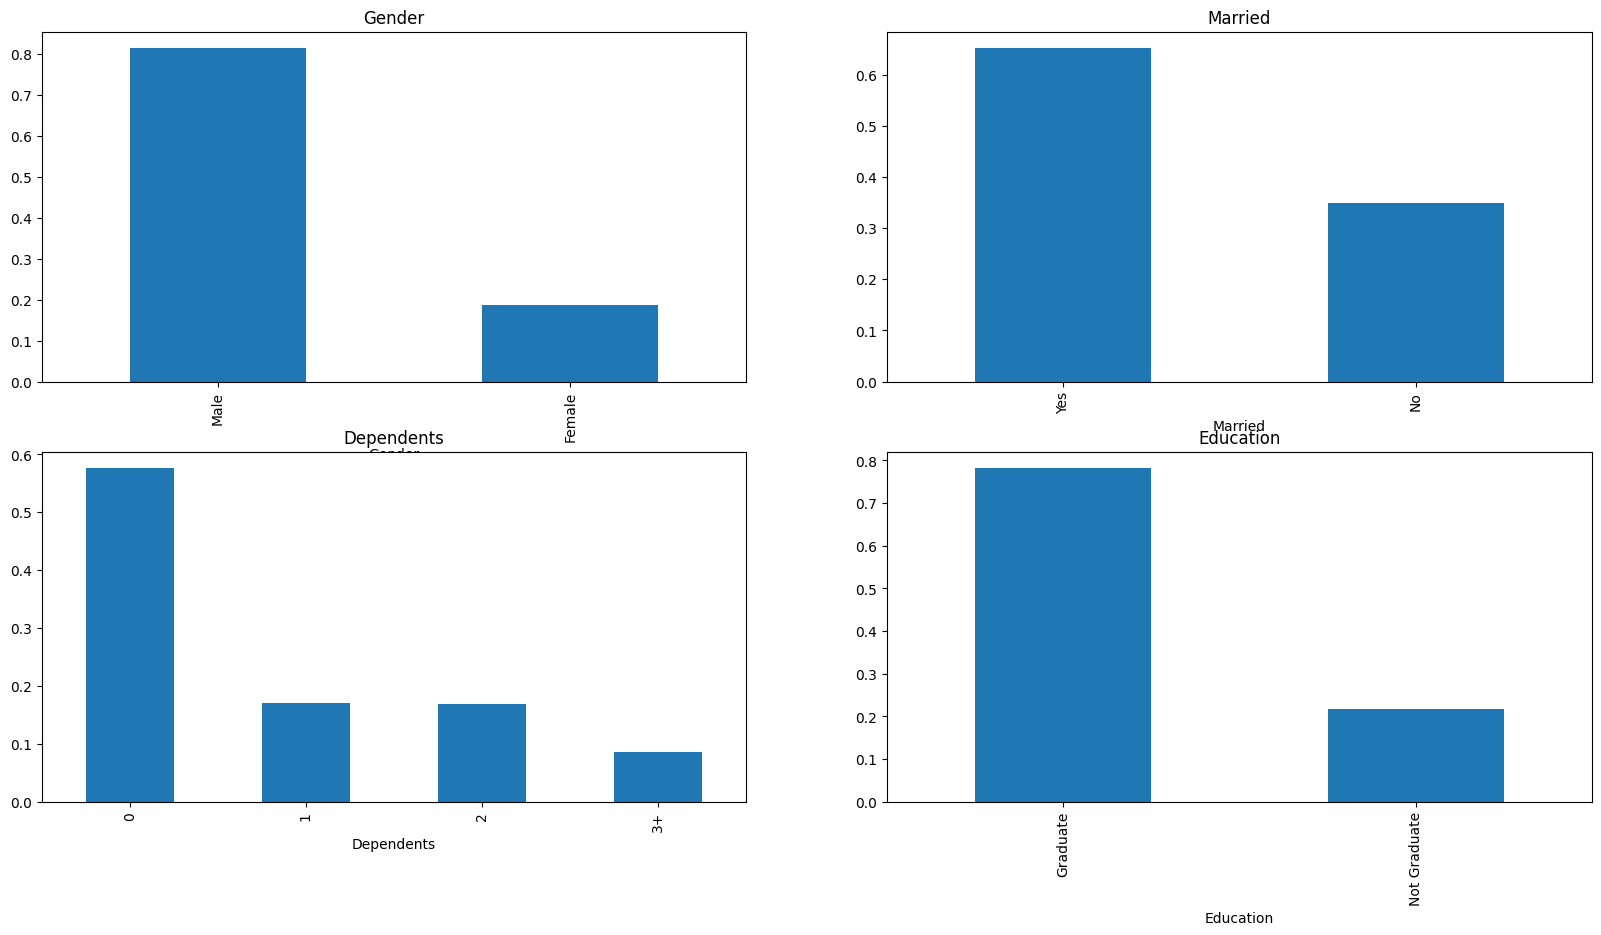

In [ ]:
# Visualizing categorical features
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')

plt.subplot(224)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

around 80% were male applicants

around 65% were married

most of the applicants didn't have any dependents

around 77% applicants are graduate

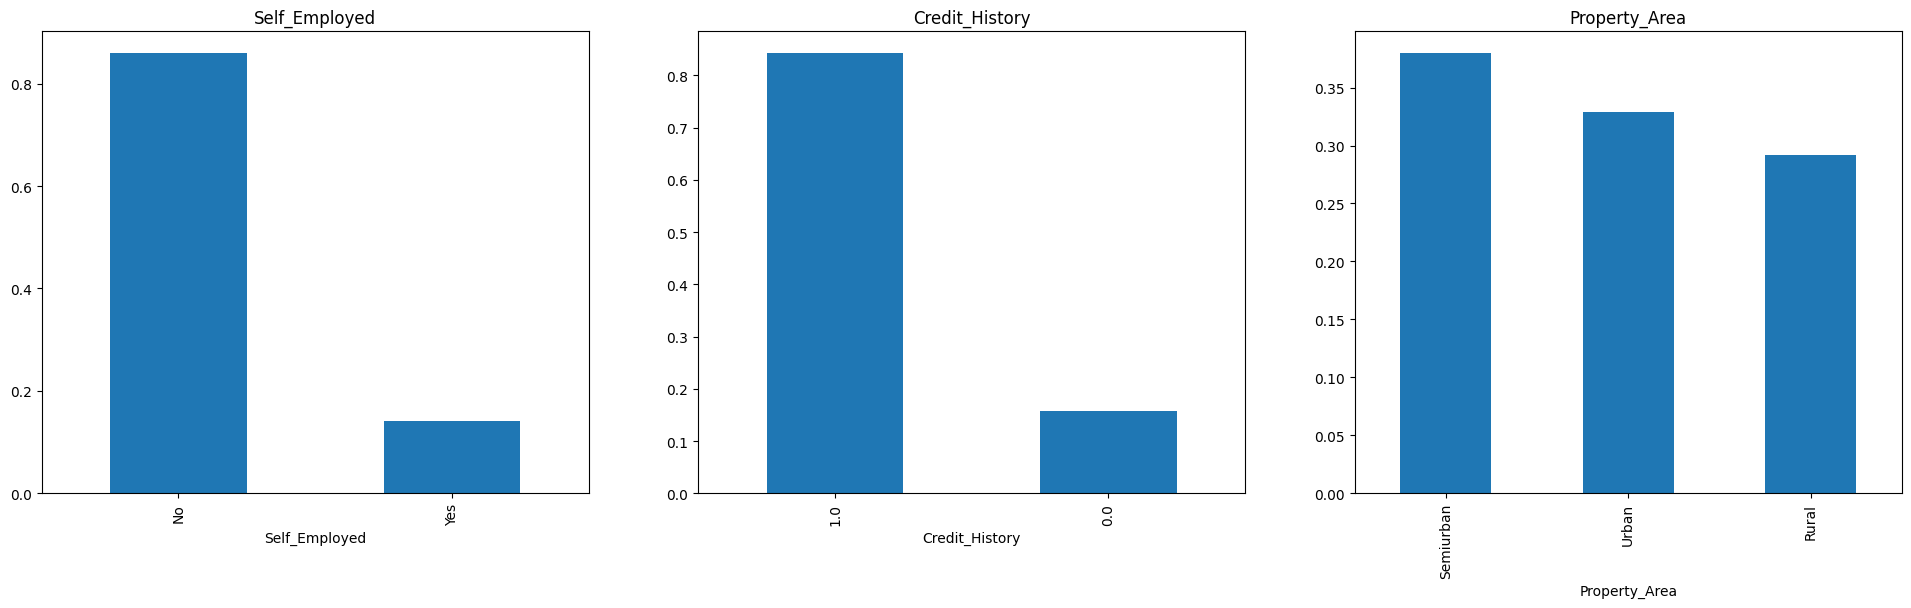

In [ ]:
# Visualizing remaining categorical features
plt.figure(1)
plt.subplot(131)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Self_Employed')

plt.subplot(132)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

around 15% of applicants are self employed

around 85% applicants have repaid there loans

most of the applicant reside in Semiurban area

### Univariate analysis of numerical features

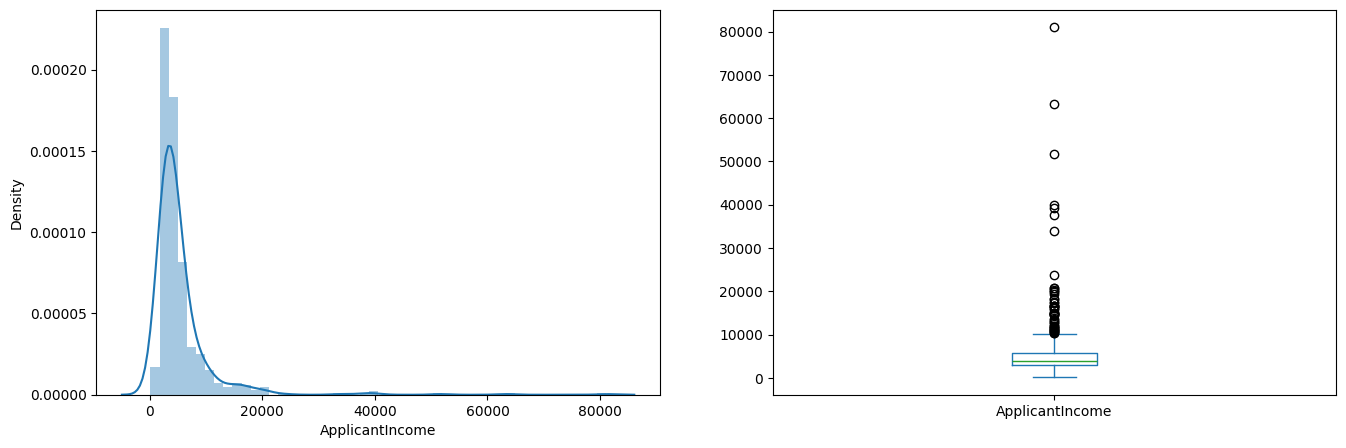

In [ ]:
# Visualizing numerical features
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

we can see the distribution of applicant income is right skewed and it has lots of outliers

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

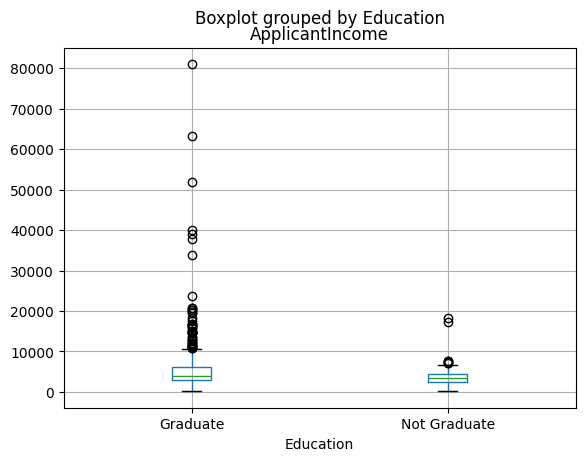

In [ ]:
train.boxplot(column='ApplicantIncome', by = 'Education')

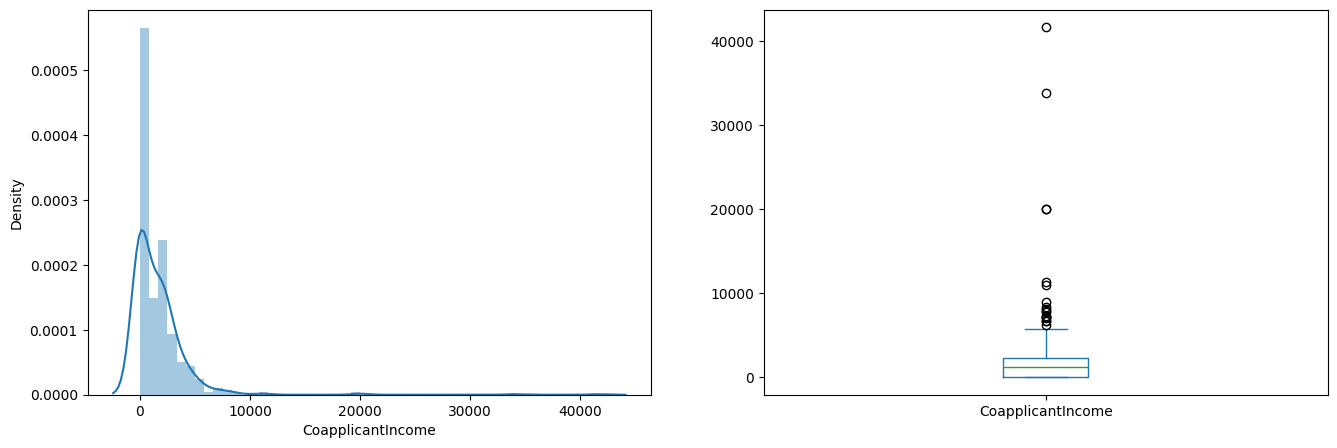

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

we observe similar distribution with coapplicant income

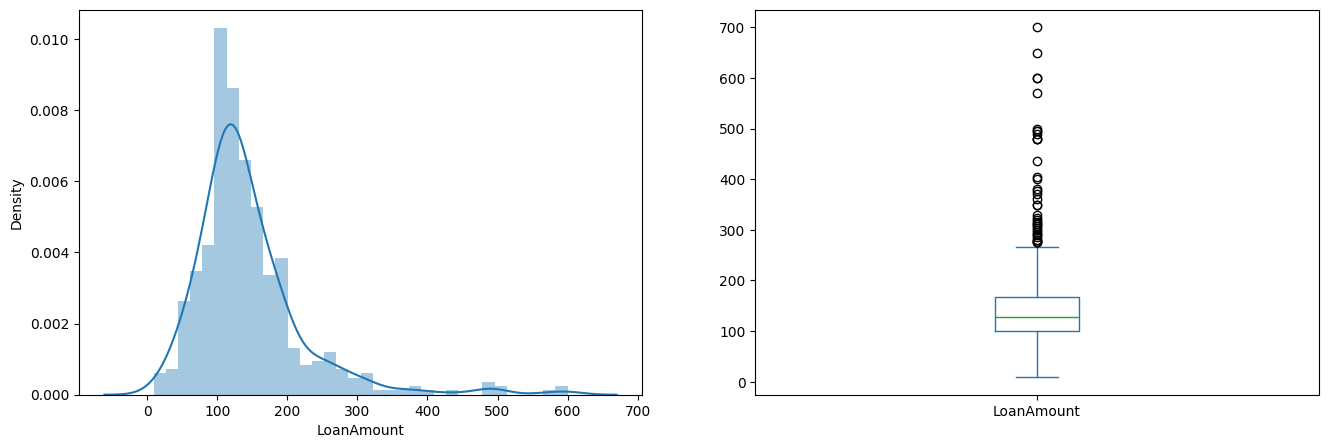

In [ ]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

# Bivariate Analysis

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


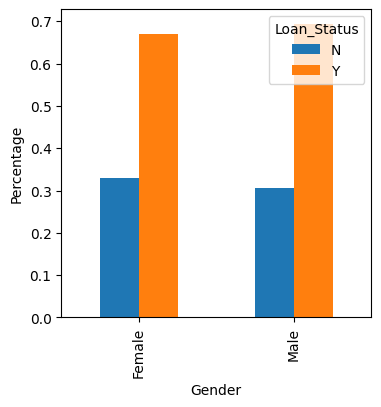

In [ ]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

almost same male and female applicants were approved or disapproved loan

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


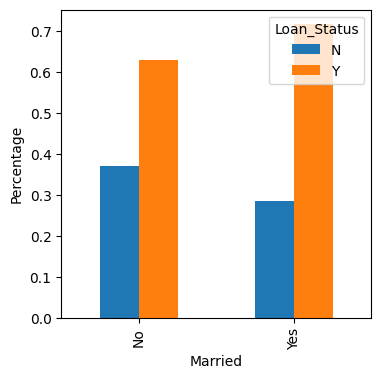

In [ ]:
print(pd.crosstab(train['Married'],train['Loan_Status']))

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


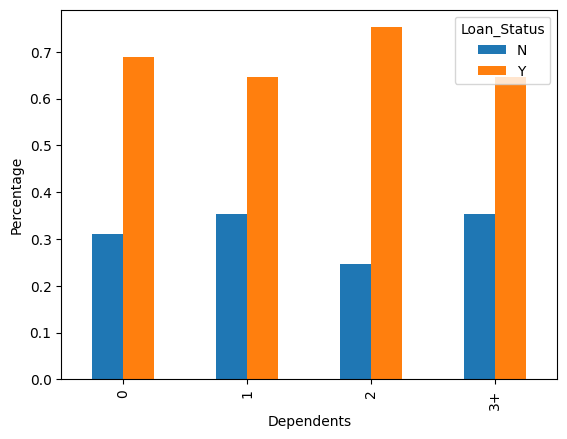

In [ ]:

print(pd.crosstab(train['Dependents'],train['Loan_Status']))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


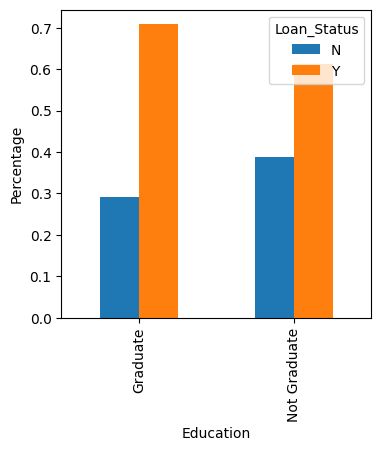

In [ ]:
print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


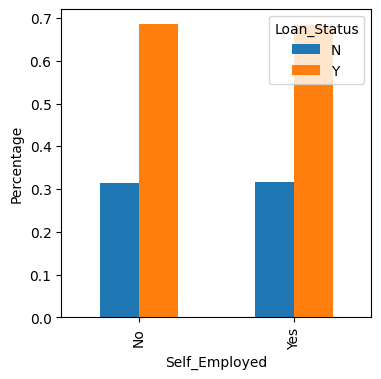

In [ ]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


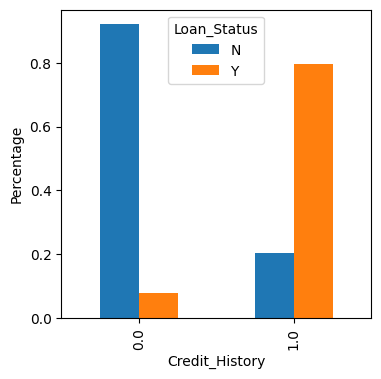

In [ ]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


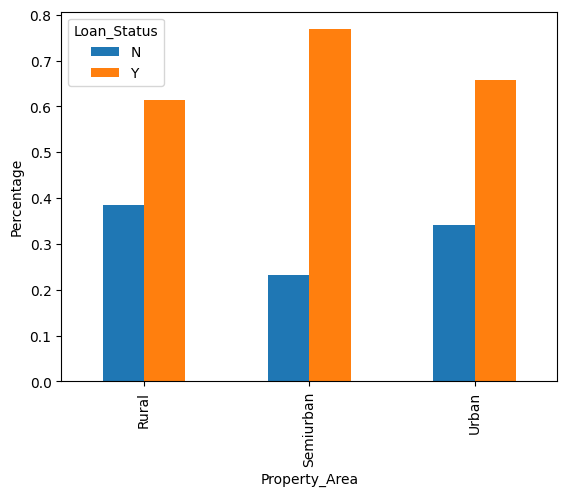

In [ ]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

<Axes: xlabel='Loan_Status'>

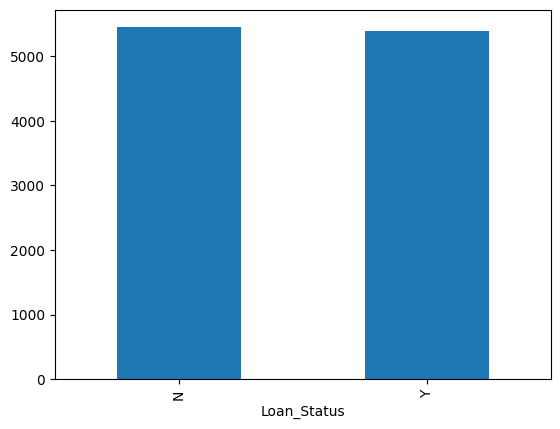

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [ ]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

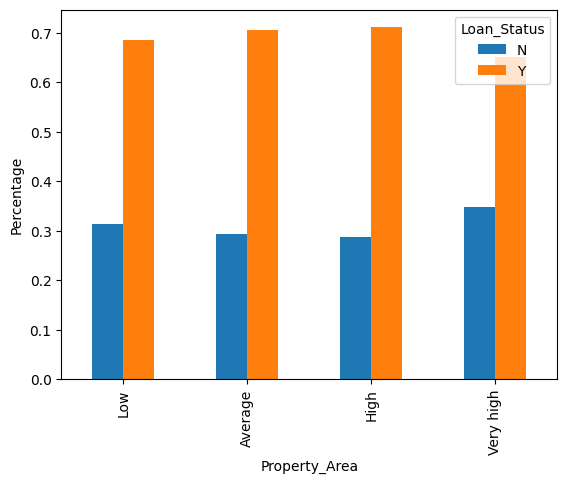

In [ ]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [ ]:
# Making bins for Coapplicant income variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

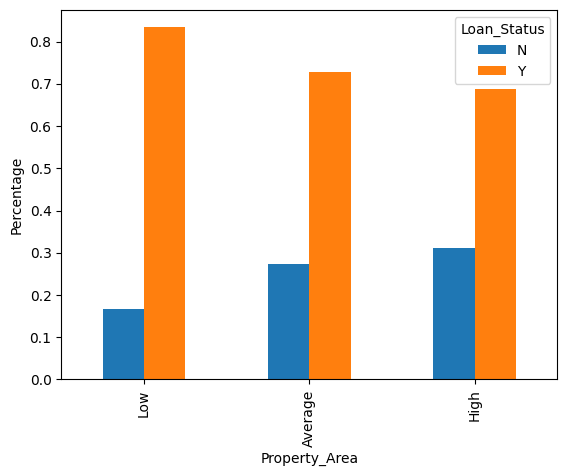

In [ ]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [ ]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

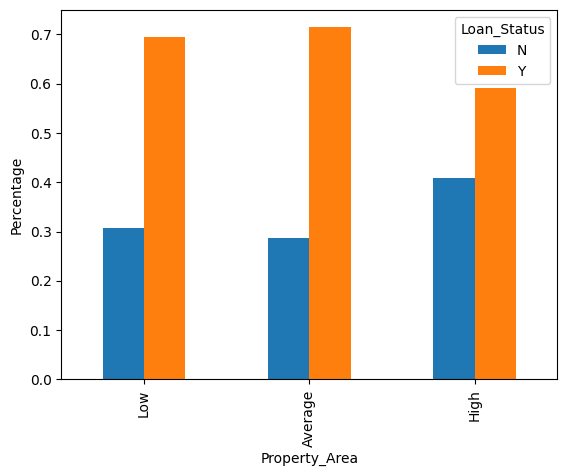

In [ ]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [ ]:
# Drop the new variable of bins
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin'], axis=1)

In [ ]:

train['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
test['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

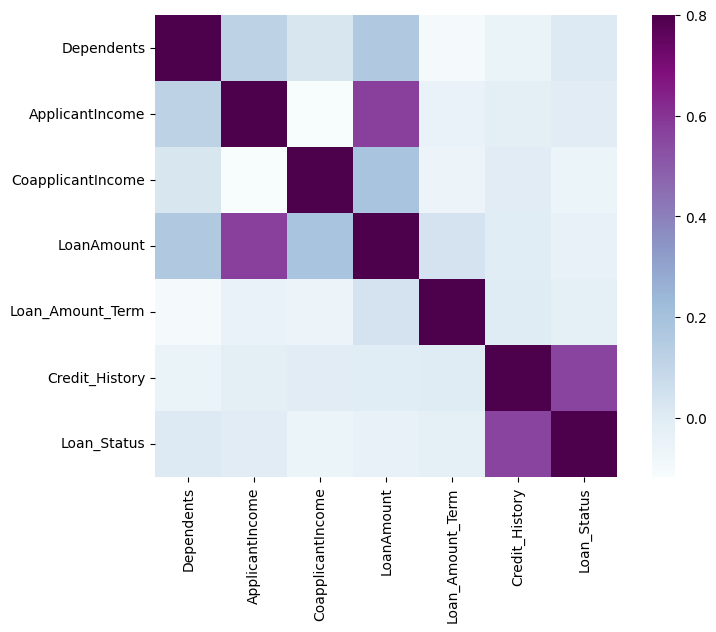

In [ ]:
# Print correlation matrix (heat map)
matrix = train.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

### Missing value and outlier treatment

In [ ]:
# Checking the missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# replacing the missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [ ]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
# Replacing the missing value in LoanAmount based on the values of Self_Employed and Education Variable
table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Similar changes in test file
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
table = test.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
test['LoanAmount'].fillna(test[test['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

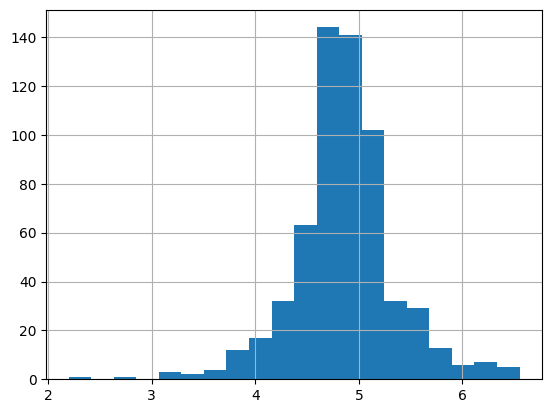

In [ ]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

## Feature Engineering

In [ ]:
# Total_Income feature
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

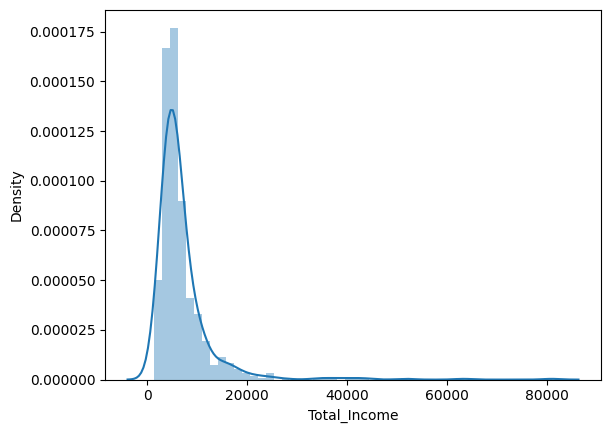

In [ ]:
sns.distplot(train['Total_Income']);

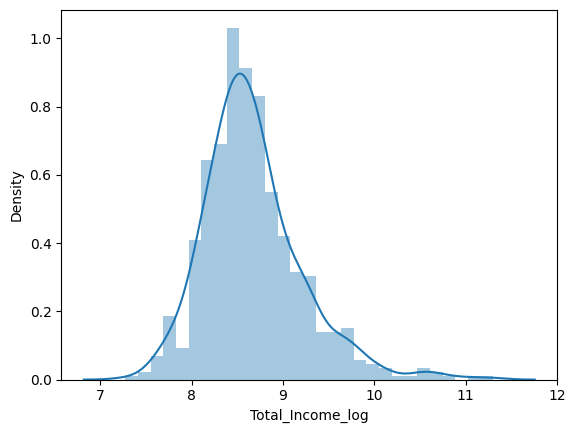

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

In [ ]:
# EMI feature
train['EMI']=(train['LoanAmount']/train['Loan_Amount_Term'])*1000
test['EMI']=(test['LoanAmount']/test['Loan_Amount_Term'])*1000

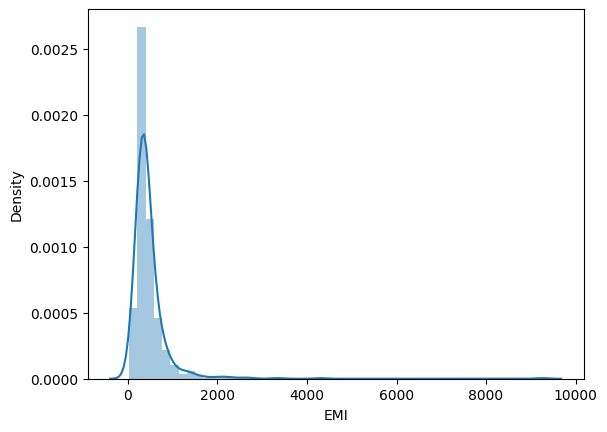

In [ ]:
sns.distplot(train['EMI']);

In [ ]:
# Balance Income feature
train['Balance Income']=train['Total_Income']-(train['EMI']) 
test['Balance Income']=test['Total_Income']-(test['EMI'])

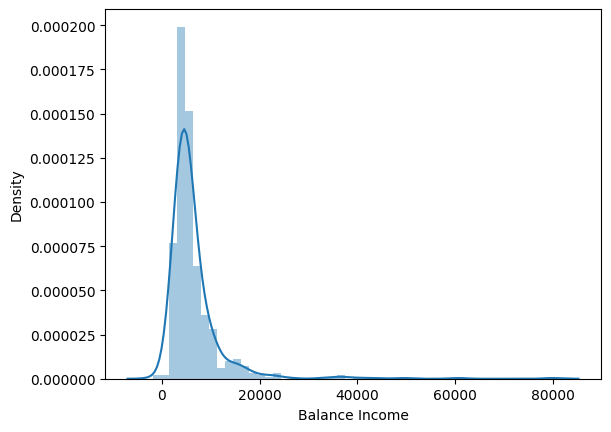

In [ ]:
sns.distplot(train['Balance Income']);

## Model Building

In [ ]:
#loan id don't have an effect on the outcome
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [ ]:
# ...existing code...
# Sklearn requires the target variable in a separate dataset.
# Drop target column correctly (use axis keyword or columns=)
x = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']                # Save target variable in separate dataset
# ...existing code...

In [ ]:
#As logistic regression takes only the numerical values as input, we have to change every categorical variable to continious 

x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
#we will use train_test_split function of sklearn to validate our predictions
from sklearn.model_selection import train_test_split

x_train,x_cv,y_train,y_cv = train_test_split(x,y, test_size=0.3, random_state=123)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
pred_cv=LR.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7783783783783784

### Decision Tree

In [ ]:
from sklearn import tree

Let's fit the decision tree model.

In [ ]:
DT = tree.DecisionTreeClassifier()
DT.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
pred_cv = DT.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.6648648648648648

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
pred_cv=RF.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7675675675675676

### Hence Logistic Regression has the highest accuracy among the three models.

### Therefore predicting the target variable of test set using Logistic Regression 

In [ ]:
pred_test = LR.predict(test)

In [ ]:
pred_test = LR.predict(test)
df=pd.DataFrame(pred_test)#converting the output to pandas dataframe

In [ ]:
test.head(1)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_Income,Total_Income_log,EMI,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,6756.756757,0,33.783784,60.0,1.0,3.519981,6756.756757,8.818298,563.063063,...,True,False,True,True,False,True,False,False,False,True


In [ ]:
df.head()

,0
0,1
1,1
2,1
3,1
4,0


In [ ]:
import pickle

# Load saved pipeline
pipeline = pickle.load(open("loan_pipeline.pkl", "rb"))

# Get the ColumnTransformer from the pipeline (assumes step name 'preprocess')
preprocess = pipeline.named_steps.get("preprocess", pipeline.named_steps.get("columntransformer"))

# extract numeric and one-hot categorical names
numeric_cols, categorical_cols = [], []
for name, transformer, cols in preprocess.transformers_:
    if name == "num":
        numeric_cols = list(cols)
    elif name == "cat":
        categorical_cols = list(cols)

# get OHE output feature names
ohe = preprocess.named_transformers_["cat"]
ohe_feature_names = list(ohe.get_feature_names_out(categorical_cols))

feature_columns = numeric_cols + ohe_feature_names

# save
pickle.dump(feature_columns, open("feature_columns.pkl", "wb"))
print(f"Saved {len(feature_columns)} feature columns to feature_columns.pkl")

Saved 20 feature columns to feature_columns.pkl
